In [1]:
#%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

In [2]:
data = imread('LaB6_d1250_detv-20-00000.tif')

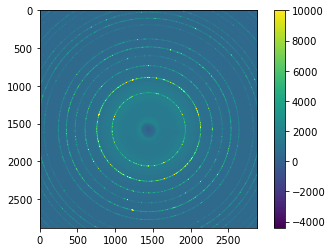

In [3]:
plt.imshow(data, vmax = 10000)
plt.colorbar()

In [4]:
import os,sys,glob
#sys.path.insert(0,'<condapath>/G2/GSASII')
#sys.path.insert(0, 'C:/Users/jmswe/anaconda3/envs/G2/GSASII')
sys.path.insert(0, 'C:/Users/jmswe/gsas2full/GSASII')
import GSASIIscriptable as G2sc

Failed to run pyspg in C:\Users\jmswe\gsas2full\GSASII\bindist
error: No module named 'pyspg'
Failed to run pyspg in C:\Users\jmswe\gsas2full\GSASII\bindist
error: No module named 'pyspg'
Attempting to download GSAS-II binary files...
Running svn command:
  C:\Users\jmswe\gsas2full\Library\bin\svn.exe list https://subversion.xray.aps.anl.gov/pyGSAS/Binaries/ --non-interactive --trust-server-cert 
	the oldest dist version, 1.21
Loading files to C:\Users\jmswe\gsas2full\GSASII\bindist\
  from https://subversion.xray.aps.anl.gov/pyGSAS/Binaries/win_64_p3.9_n1.21/

svn command:  C:\Users\jmswe\gsas2full\Library\bin\svn.exe switch https://subversion.xray.aps.anl.gov/pyGSAS/Binaries/win_64_p3.9_n1.21/ C:\Users\jmswe\gsas2full\GSASII\bindist\ --non-interactive --trust-server-cert --accept theirs-conflict --force -rHEAD --ignore-ancestry 

=== Output from svn switch===========================================
D    C:\Users\jmswe\gsas2full\GSASII\bindist\histosigma2d.cp37-win_amd64.pyd
D    C:\U

In [5]:
datadir = 'C:/Users/jmswe/Documents/GainMap_07July2021/StaffNov21/Calibration'##can change to another directory
os.chdir(datadir) #set working directory to current directory
dataoutdir = os.getcwd() ##use current working directory

In [48]:
#gpx = G2sc.G2Project(gpxfile=os.path.join(datadir,'LaB6_d1250_detv0.gpx')) #read in existing project file with tifs, assumes calibration has been done already
#gpx = G2sc.G2Project(gpxfile=os.path.join(datadir,'LaB6_d1250_detv20.gpx'))
gpx = G2sc.G2Project(gpxfile=os.path.join(datadir,'LaB6_d1250_detv-20.gpx'))

In [49]:
imglist = [] ##store list of human readable image names
for namename in gpx.names:
    if namename[0].startswith("IMG"):
        imglist.append(namename[0])
        
imglist2=gpx.images()

In [50]:
calibcalib=imglist2[0].data['Image Controls'] ##store controls from selected image
maskmask=imglist2[0].getMasks()

In [51]:
TATA=G2sc.G2img.Make2ThetaAzimuthMap(calibcalib,(0,2880),(0,2880)) #create 2theta, azimuth, polarization maps (modification of W. Xu method)
#np.save('2theta map, v0', TATA[0])
#np.save('2theta map, v20', TATA[0])
np.save('2theta map, v-20', TATA[0])

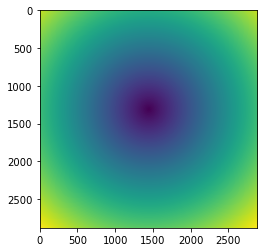

In [33]:
plt.imshow(TATA[0])

In [27]:
imglist

['IMG LaB6_d1250_detv0-00000.tif']